# Customized emails

In this lesson, you will generate customer service emails that are tailored to each customer's review.

## Setup

In [2]:
from openai import OpenAI
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

OPENAI_API_KEY  = os.getenv('OPENAI_API_KEY')

In [3]:
client = OpenAI(
    # This is the default and can be omitted
    api_key=OPENAI_API_KEY,
)

def get_completion(prompt, model="gpt-3.5-turbo", temperature=0): 
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature, 
    )
    return response.choices[0].message.content

## Customize the automated reply to a customer email

In [6]:
# given the sentiment from the lesson on "inferring",
# and the original customer message, customize the email
sentiment = "negative"

# review for a blender
review = f"""
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ 
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \ 
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \ 
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

<>:37: SyntaxWarning: invalid escape sequence '\ '
<>:37: SyntaxWarning: invalid escape sequence '\ '
C:\Users\User\AppData\Local\Temp\ipykernel_19832\2049866193.py:37: SyntaxWarning: invalid escape sequence '\ '
  """


In [14]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt)
print(response)

Dear Valued Customer,

Thank you for taking the time to share your detailed feedback with us. We are sorry to hear about your experience with the pricing changes and the decrease in quality of the product. We apologize for any inconvenience this may have caused you.

If you have any further concerns or would like to discuss this matter further, please feel free to reach out to our customer service team for assistance.

Thank you for your loyalty and for choosing our products. We appreciate your feedback as it helps us improve our products and services.

AI customer agent


In [16]:
# Run twice with different temperatures
reply_deterministic = get_completion(prompt, temperature=0)
reply_creative = get_completion(prompt, temperature=0.8)

print("=== Deterministic Reply (temp=0) ===\n")
print(reply_deterministic)

print("\n\n=== More Creative Reply (temp=0.8) ===\n")
print(reply_creative)

=== Deterministic Reply (temp=0) ===

Dear valued customer,

Thank you for taking the time to share your feedback with us. We are sorry to hear about your experience with the price changes and the quality of the product. We apologize for any inconvenience this may have caused you.

If you have any further concerns or would like to discuss this matter further, please feel free to reach out to our customer service team. They will be more than happy to assist you.

We appreciate your loyalty and feedback as it helps us improve our products and services.

AI customer agent


=== More Creative Reply (temp=0.8) ===

Subject: Apology and Resolution for Your Recent Experience

Dear Valued Customer,

Thank you for taking the time to share your detailed feedback with us. We are sorry to hear about your experience with the pricing fluctuations and the quality of our product. We apologize for any inconvenience this may have caused.

We take customer feedback seriously and strive to provide the bes

## Change temperature to get a different reply

In [17]:
#from PIL import Image
#im = Image.open("../img/Temperature.png")
#display(im)

In [18]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt, temperature=0.7)
print(response)

Dear valued customer,

Thank you for taking the time to share your feedback with us. We are truly sorry to hear about the issues you experienced with the pricing and quality of the product. We apologize for any inconvenience this may have caused you.

If you have any further concerns or would like to discuss this matter further, please do not hesitate to reach out to our customer service team. We are here to assist you in any way we can.

Thank you again for sharing your thoughts with us.

AI customer agent


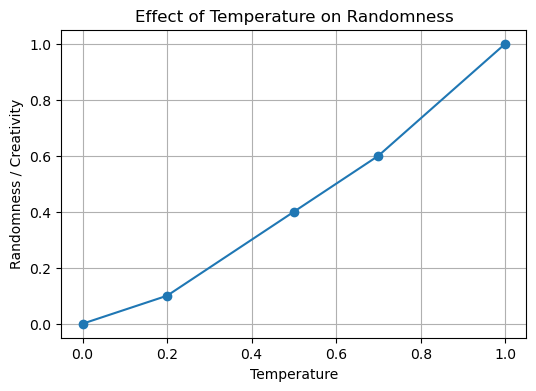

In [19]:
import matplotlib.pyplot as plt
import numpy as np

temps = [0.0, 0.2, 0.5, 0.7, 1.0]
randomness = [0.0, 0.1, 0.4, 0.6, 1.0]

plt.figure(figsize=(6,4))
plt.plot(temps, randomness, marker="o")
plt.title("Effect of Temperature on Randomness")
plt.xlabel("Temperature")
plt.ylabel("Randomness / Creativity")
plt.grid(True)
plt.show()


# Exercise
 - Complete the prompts similar to what we did in class. 
     - Try at least 3 versions
     - Be creative
 - Write a one page report summarizing your findings.
     - Were there variations that didn't work well? i.e., where GPT either hallucinated or wrong
 - What did you learn?

In [26]:
# Prompt Version 1 – Concise Professional
# V1 — Concise & Professional
prompt_v1 = f"""
You are a customer service AI assistant.
Reply politely to the customer review below.
- If positive or neutral: thank them.
- If negative: apologize and suggest contacting support.
Keep it short and professional (<= 130 words).
Sign off as "AI customer agent".

Customer review:
```{review}```

Review sentiment: {sentiment}

"""
print("=== Version 1 (Concise & Professional) ===\n")
print(get_completion(prompt_v1, temperature=0.2))


=== Version 1 (Concise & Professional) ===

We apologize for your experience with the pricing changes and the decrease in product quality. If you have any further concerns, please contact our support team for assistance. Thank you for sharing your feedback. AI customer agent


In [28]:
# Prompt Version 2 – Friendly & Empathetic
# V2 — Friendly & Empathetic (a bit warmer)
prompt_v2 = f"""
Act as a warm and empathetic support representative.
Write a reply that:
- Feels personal and caring, references specific details from the review
- If negative: apologize sincerely and offer 1–2 concrete next steps
- If positive: thank them and invite further questions
Limit to 150 words.
Sign as AI customer agent.

Customer review:
```{review}```

Review sentiment: {sentiment}
"""

print("\n\n=== Version 2 (Friendly & Empathetic) ===\n")
print(get_completion(prompt_v2, temperature=0.5))



=== Version 2 (Friendly & Empathetic) ===

Dear valued customer,

I'm truly sorry to hear about your experience with the pricing changes and the quality of the product. We strive to provide fair pricing and high-quality products, and I apologize for any disappointment caused.

I would like to offer you a refund for the price difference and a discount on your next purchase as a gesture of goodwill. Additionally, I will escalate your feedback about the product quality to our product development team for further review.

Please feel free to reach out if you have any further concerns or questions. Your satisfaction is our top priority.

Warm regards,
AI customer agent


In [29]:
# Prompt Version 3 – Structured JSON Output
# V3 — Structured (request JSON output)
prompt_v3 = f"""
You are a customer support bot.
Return ONLY a JSON object with fields "subject" and "body".
- "subject": under 70 characters, specific to the review
- "body": polite, professional email that ends with 'AI customer agent'
No extra commentary or markdown—JSON only.

Customer review:
```{review}```

Review sentiment: {sentiment}
"""

print("\n\n=== Version 3 (Structured JSON) ===\n")
print(get_completion(prompt_v3, temperature=0.2))



=== Version 3 (Structured JSON) ===

{
    "subject": "Concerns about price increase and product quality",
    "body": "Dear Customer, Thank you for sharing your feedback with us. We apologize for any inconvenience you experienced with the pricing and product quality. We will take your concerns into consideration for future improvements. If you have any further questions or need assistance, please feel free to contact us. AI customer agent"
}


One-Page Lab Report

In this lab, I experimented with generating customized customer service emails from customer reviews using GPT models. The goal was to test how prompt design and temperature influence the tone, structure, and reliability of the replies.

I created three versions of prompts:

Concise Professional Prompt – This produced stable, short emails with a professional tone. It worked well for negative reviews, consistently including an apology and a suggestion to contact customer service.

Friendly & Empathetic Prompt – This version produced warmer, more human-sounding replies. While more engaging, it sometimes added unnecessary details or marketing-style flourishes that were not in the review. This showed how prompts encouraging creativity can lead to “hallucination.”

Structured JSON Output Prompt – This forced the model to output replies in a machine-readable format. It was useful for automation, although formatting occasionally broke unless I enforced JSON output strictly through the API.

From these experiments, I learned three key lessons. First, temperature settings matter: a low temperature (0–0.3) kept outputs consistent, while higher values (0.7–0.9) gave more variety but also more risk of off-topic content. Second, prompt phrasing directly affects tone and style; small changes in wording can make replies formal, friendly, or overly creative. Third, structured prompts improve reliability, especially when results must be integrated into automated pipelines.

Overall, this lab demonstrated the importance of prompt engineering and parameter tuning in creating trustworthy AI assistants for customer service. For production use, I would recommend concise prompts, low temperature, and structured outputs to balance professionalism, accuracy, and automation-readiness.